In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
fish = pd.read_csv('/content/Fish1.csv')


In [ ]:
# Function that Convert Dataframe to Bunch
from sklearn.utils import Bunch

def dataframe_to_bunch(fish, Size):
    data = fish.drop(Size, axis=1)
    target = fish[Size]
    Height = list(fish.Height)
    Width = list(fish.Width)
    target_names = list(fish.Species)
    return Bunch(data=data, target=target, target_names=target_names, Height = Height, Width = Width)


#df = pd.read_csv('your_dataframe.csv')
Size = 'Size'
Width = 'Width'
Height = 'Height'

bunch = dataframe_to_bunch(fish, Size)


In [ ]:
bunch.data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
#print(list(shirt.keys()))
#print(iris.target.shape)
print(list(bunch.keys()))
#print(iris.target)

['data', 'target', 'target_names', 'Height', 'Width']


In [ ]:
# Here is how to select first 2 columns for estimation
from sklearn.linear_model import LogisticRegression

x = pd.DataFrame(bunch.data).iloc[:, [5, 6]].to_numpy()
#x_1 = pd.DataFrame(bunch.data).iloc[:, [5]].to_numpy()
#x_2 = pd.DataFrame(bunch.data).iloc[:, [6]].to_numpy()

y = (bunch['target']==0 ).astype(int)
#y_1 = (bunch['target']==1 ).astype(int)
#y_2 = (bunch['target']==2 ).astype(int)
#y_3 = (bunch['target']==3 ).astype(int)
#y_4 = (bunch['target']==4).astype(int)
#y_5 = (bunch['target']==5 ).astype(int)
#y_6 = (bunch['target']==6 ).astype(int)


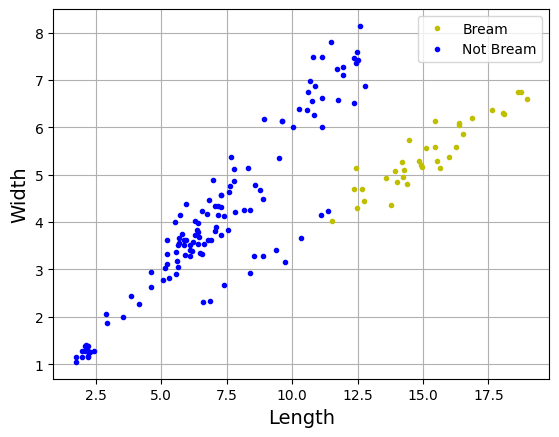

In [ ]:

plt.plot(x[:,0][y==1],x[:,1][y==1], 'y.' , label =  'Bream')
plt.plot(x[:,0][y==0],x[:,1][y==0], 'b.' , label = 'Not Bream')
plt.xlabel('Length', fontsize = 14)
plt.ylabel('Width',fontsize = 14)

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Ultra = LogisticRegression()
Ultra.fit(x,y)

x_line = np.linspace(15,10,10)
y_line = (-Ultra.coef_[0][0]/Ultra.coef_[0][1])*x_line + (-Ultra.intercept_/Ultra.coef_[0][1])

#print(softmax_reg.coef_[0,0])

print(Ultra.coef_)
print(Ultra.intercept_)

[[ 1.9815626  -1.38174949]]
[-17.15687117]


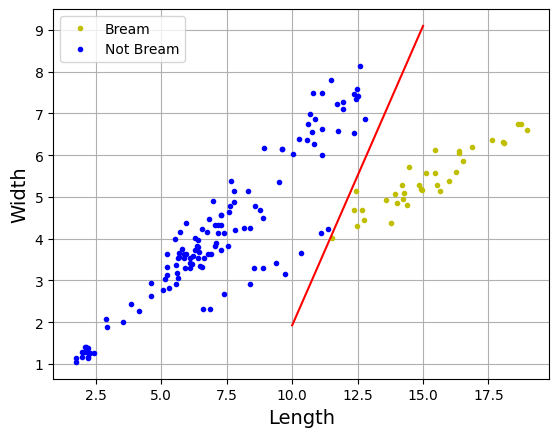

In [ ]:
plt.plot(x[:,0][y==1],x[:,1][y==1], 'y.' , label =  'Bream')
plt.plot(x[:,0][y==0],x[:,1][y==0], 'b.' , label = 'Not Bream')
plt.xlabel('Length', fontsize = 14)
plt.ylabel('Width',fontsize = 14)
plt.plot(x_line,y_line,'r')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Size
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0


In [ ]:
X = fish.iloc[:,1:7]
X.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
Y = fish.select_dtypes(include=[object])
Y.tail()

,Species
154,Smelt
155,Smelt
156,Smelt
157,Smelt
158,Smelt


In [ ]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()

In [ ]:
y_new = Y.apply(label.fit_transform)
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
154    0
155    0
156    0
157    0
158    0
Name: Size, Length: 159, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_new, train_size= 0.8)
print(X_test.shape)
print(X_train.shape)

(32, 6)
(127, 6)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_new)

StandardScaler()

In [ ]:
print(X_train)

     Weight  Length1  Length2  Length3   Height   Width
104   265.0     25.4     27.5     28.9   7.0516  4.3350
85    130.0     19.3     21.3     22.8   6.3840  3.5340
147     7.0     10.1     10.6     11.6   1.7284  1.1484
67    170.0     19.0     20.7     23.2   9.3960  3.4104
55    270.0     23.6     26.0     28.7   8.3804  4.2476
..      ...      ...      ...      ...      ...     ...
1     290.0     24.0     26.3     31.2  12.4800  4.3056
138   567.0     43.2     46.0     48.7   7.7920  4.8700
57    306.0     25.6     28.0     30.8   8.7780  4.6816
33    975.0     37.4     41.0     45.9  18.6354  6.7473
143  1550.0     56.0     60.0     64.0   9.6000  6.1440

[127 rows x 6 columns]


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (100,100,100), max_iter= 1000)
mlp_model.fit(X_train,y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)

In [ ]:
predicted_y = mlp_model.predict(X_test)
print(predicted_y)
print(y_test)

[2 0 2 2 5 4 2 2 0 2 5 2 2 2 2 1 2 0 2 2 0 2 0 0 2 3 2 2 2 0 0 6]
     Species
76         2
30         0
122        2
116        2
40         4
48         4
141        3
117        2
26         0
44         4
72         2
53         4
120        2
43         4
50         4
13         0
123        2
32         0
113        2
112        2
16         0
93         2
31         0
9          0
127        2
134        3
54         4
36         4
140        3
12         0
34         0
52         4


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,predicted_y))

[[ 8  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0 10  0  0  1  0]
 [ 0  0  2  1  0  0  0]
 [ 0  0  6  0  1  1  1]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.00      0.00      0.00         0
           2       0.56      0.91      0.69        11
           3       1.00      0.33      0.50         3
           4       1.00      0.11      0.20         9
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.62        32
   macro avg       0.51      0.32      0.33        32
weighted avg       0.85      0.62      0.60        32



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
